https://machinelearningmastery.com/predictive-model-for-the-phoneme-imbalanced-classification-dataset/

In [36]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline

In [12]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [13]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'
    
df = pd.read_csv( url , header = None )

In [14]:
df.head()

,0,1,2,3,4,5
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


In [15]:
df.shape

(5404, 6)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5404 non-null   float64
 1   1       5404 non-null   float64
 2   2       5404 non-null   float64
 3   3       5404 non-null   float64
 4   4       5404 non-null   float64
 5   5       5404 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 253.4 KB


In [17]:
from collections import Counter

In [18]:
target = df.values[ : , -1 ]

counter = Counter( target )

print( counter )

Counter({0.0: 3818, 1.0: 1586})


In [19]:
for k , v in counter.items():

    p = v / len( target ) * 100

    print( f'class : {k} | count : {v} | % : {p:.2f} ' )

class : 0.0 | count : 3818 | % : 70.65 
class : 1.0 | count : 1586 | % : 29.35 


In [20]:
from matplotlib import pyplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D710278>,
      dtype=object)

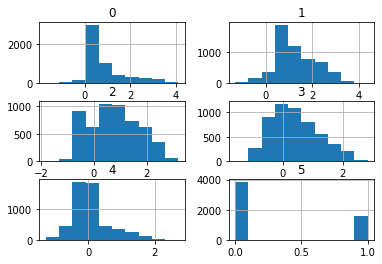

In [21]:
df.hist()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
data = df.values

X = data[ : , : -1 ]

y = data[ : , -1 ]

y = LabelEncoder().fit_transform( y )

# Baseline Result

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer

from imblearn.metrics import geometric_mean_score

In [25]:
def evaluate_model( X , y , model ) :

    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

    metric = make_scorer( geometric_mean_score )
    
    scores = cross_val_score( model , X , y , scoring = metric , cv = cv , n_jobs = -1 )

    return scores

In [26]:
from sklearn.dummy import DummyClassifier

In [27]:
model = DummyClassifier( strategy = 'uniform' )

In [28]:
from numpy import mean

from numpy import std

In [29]:
scores = evaluate_model( X , y , model )

print( f'dummy model | accuracy : {mean(scores):.3f} ( {std(scores):.3f} )' )

dummy model | accuracy : 0.503 ( 0.021 )


# <div class="alert alert-block alert-success">Evaluate Data Oversampling Algorithms</div>

In [30]:
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import ExtraTreesClassifier


from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import BorderlineSMOTE

from imblearn.over_sampling import SVMSMOTE

from imblearn.over_sampling import ADASYN


from imblearn.pipeline import Pipeline


In [31]:
def get_models():
    
    models = dict()
    
    
    
    steps = [ ( 'step_scaling' , MinMaxScaler() ) ,
              ( 'step_sampling' , RandomOverSampler() ) ,
              ( 'step_modeling' , ExtraTreesClassifier( n_estimators = 1000 ) ) ]

    model = Pipeline( steps = steps )
    
    models[ 'ROS' ] = model
    

    
    steps = [ ( 'step_scaling' , MinMaxScaler() ) ,
              ( 'step_sampling' , SMOTE() ) ,
              ( 'step_modeling' , ExtraTreesClassifier( n_estimators = 1000 ) ) ]

    model = Pipeline( steps = steps )
    
    models[ 'SMOTE' ] = model
    

    
    steps = [ ( 'step_scaling' , MinMaxScaler() ) ,
              ( 'step_sampling' , BorderlineSMOTE() ) ,
              ( 'step_modeling' , ExtraTreesClassifier( n_estimators = 1000 ) ) ]

    model = Pipeline( steps = steps )
    
    models[ 'BLSMOTE' ] = model
    
    
    
    steps = [ ( 'step_scaling' , MinMaxScaler() ) ,
              ( 'step_sampling' , SVMSMOTE() ) ,
              ( 'step_modeling' , ExtraTreesClassifier( n_estimators = 1000 ) ) ]

    model = Pipeline( steps = steps )
    
    models[ 'SVMSMOTE' ] = model
    

    
    steps = [ ( 'step_scaling' , MinMaxScaler() ) ,
              ( 'step_sampling' , ADASYN() ) ,
              ( 'step_modeling' , ExtraTreesClassifier( n_estimators = 1000 ) ) ]

    model = Pipeline( steps = steps )
    
    models[ 'ADASYN' ] = model   

    
    return models

In [32]:
models = get_models()

print( models )

{'ROS': Pipeline(steps=[('step_scaling', MinMaxScaler()),
                ('step_sampling', RandomOverSampler()),
                ('step_modeling', ExtraTreesClassifier(n_estimators=1000))]), 'SMOTE': Pipeline(steps=[('step_scaling', MinMaxScaler()), ('step_sampling', SMOTE()),
                ('step_modeling', ExtraTreesClassifier(n_estimators=1000))]), 'BLSMOTE': Pipeline(steps=[('step_scaling', MinMaxScaler()),
                ('step_sampling', BorderlineSMOTE()),
                ('step_modeling', ExtraTreesClassifier(n_estimators=1000))]), 'SVMSMOTE': Pipeline(steps=[('step_scaling', MinMaxScaler()), ('step_sampling', SVMSMOTE()),
                ('step_modeling', ExtraTreesClassifier(n_estimators=1000))]), 'ADASYN': Pipeline(steps=[('step_scaling', MinMaxScaler()), ('step_sampling', ADASYN()),
                ('step_modeling', ExtraTreesClassifier(n_estimators=1000))])}


In [33]:
models = get_models()

results = list()

names = list()


for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( X , y , model ) 
    
    results.append( scores )
    
    print( f' model : {name} : {mean(scores):.3f} ( {std(scores):.3f} )' )

 model : ROS : 0.891 ( 0.017 )
 model : SMOTE : 0.906 ( 0.015 )
 model : BLSMOTE : 0.909 ( 0.013 )
 model : SVMSMOTE : 0.907 ( 0.015 )
 model : ADASYN : 0.910 ( 0.012 )


In [34]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1fded400>,
 'caps': [<matplotlib.lines.Line2D at 0x1fdedb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fde0f98>,
 'medians': [<matplotlib.lines.Line2D at 0x1fdedf28>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fdf9860>,
 'means': [<matplotlib.lines.Line2D at 0x1fdf9518>,
  <matplotlib.lines.Line2D at 0x1fe42f98>]}

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

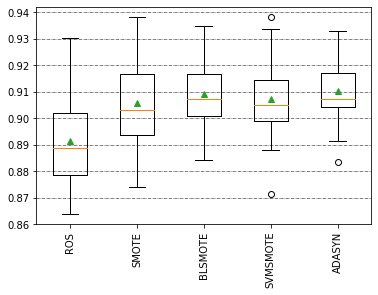

In [37]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color = 'black' , linestyle = '-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()